In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

#Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [83]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D, Flatten
from keras.utils.np_utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
#from keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import matplotlib.pyplot as plt

In [84]:
#Loading training set into dataframe
train_df = pd.read_parquet('/content/drive/MyDrive/dataset/nsl-kdd-strgenix/KDDTrain.parquet')
#Loading testing set into dataframe
test_df = pd.read_parquet('/content/drive/MyDrive/dataset/nsl-kdd-strgenix/KDDTest.parquet')

In [85]:
#Reset column names for training set
train_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [86]:
#Reset column names for testing set
test_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [87]:
#Dropping the last columns of training set
train_df = train_df.drop('difficulty_level', 1) # we don't need it in this project
train_df.shape
#Dropping the last columns of testing set
test_df = test_df.drop('difficulty_level', 1)
test_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


(22544, 42)

In [88]:
#defining col list
cols = ['protocol_type','service','flag']

In [89]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df

In [90]:
#Applying one hot encoding to df's
train_df_1 = one_hot(train_df,cols)
test_df_1 = one_hot(test_df,cols)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


In [91]:
#Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [92]:
#Dropping subclass column for training  and testing set
tmp = train_df_1.pop('subclass')
tmp1 = test_df_1.pop('subclass')

In [93]:
#Normalizing training set
train_df_2 = normalize(train_df_1,train_df_1.columns)
train_df_2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [94]:
#Normalizing testing set
test_df_2 = normalize(test_df_1,test_df_1.columns)
test_df_2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0.000000,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.000000,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
#Fixing labels for training set
classlist_train = []
check1_train = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2_train = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3_train = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4_train = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount_train=0
ProbeCount_train=0
U2RCount_train=0
R2LCount_train=0
NormalCount_train=0

for item in tmp:
    if item in check1_train:
        classlist_train.append("DoS")
        DoSCount_train=DoSCount_train+1
    elif item in check2_train:
        classlist_train.append("Probe")
        ProbeCount_train=ProbeCount_train+1
    elif item in check3_train:
        classlist_train.append("U2R")
        U2RCount_train=U2RCount_train+1
    elif item in check4_train:
        classlist_train.append("R2L")
        R2LCount_train=R2LCount_train+1
    else:
        classlist_train.append("Normal")
        NormalCount_train=NormalCount_train+1   

In [96]:
print(DoSCount_train)
print( NormalCount_train)
print(ProbeCount_train)
print(R2LCount_train)
print(U2RCount_train)

45927
67343
11656
995
52


In [97]:
#Fixing labels for testing set
classlist_test = []
check1_test = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2_test = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3_test = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4_test = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount_test=0
ProbeCount_test=0
U2RCount_test=0
R2LCount_test=0
NormalCount_test=0

for item in tmp1:
    if item in check1_test:
        classlist_test.append("DoS")
        DoSCount_test=DoSCount_test+1
    elif item in check2_test:
        classlist_test.append("Probe")
        ProbeCount_test=ProbeCount_test+1
    elif item in check3_test:
        classlist_test.append("U2R")
        U2RCount_test=U2RCount_test+1
    elif item in check4_test:
        classlist_test.append("R2L")
        R2LCount_test=R2LCount_test+1
    else:
        classlist_test.append("Normal")
        NormalCount_test=NormalCount_test+1   

In [98]:
print(DoSCount_test)
print( NormalCount_test)
print(ProbeCount_test)
print(R2LCount_test)
print(U2RCount_test)

7460
9889
2421
2707
67


In [99]:
#Appending class column to training set
train_df_2["Class"] = classlist_train
train_df_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
125970,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
125971,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS


In [100]:
#Appending class column to testing set
test_df_2["Class"] = classlist_test
test_df_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Probe
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
22541,0.000000,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,DoS
22542,0.000000,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal


In [101]:
y_train = train_df_2['Class']
y_test = test_df_2['Class']

In [102]:
X_train = train_df_2.drop('Class', 1)
X_test = test_df_2.drop('Class', 1)
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [103]:
batch_size = 32
cnn_bilstm = Sequential()
cnn_bilstm.add(Convolution1D(64, kernel_size=122, padding="same",activation="relu",input_shape=(122, 1)))
cnn_bilstm.add(MaxPooling1D(pool_size=5))
cnn_bilstm.add(BatchNormalization())
cnn_bilstm.add(Bidirectional(LSTM(64, return_sequences=False))) 
cnn_bilstm.add(Reshape((128, 1), input_shape = (128, )))
cnn_bilstm.add(MaxPooling1D(pool_size=5))
cnn_bilstm.add(BatchNormalization())
cnn_bilstm.add(Bidirectional(LSTM(128, return_sequences=False)))     
cnn_bilstm.add(Dropout(0.5))
cnn_bilstm.add(Dense(5, activation="softmax"))

In [104]:
# define optimizer and objective, compile cnn_bilstm
cnn_bilstm.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [105]:
cnn_bilstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 122, 64)           7872      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 24, 64)           256       
 hNormalization)                                                 
                                                                 
 bidirectional_6 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 reshape_3 (Reshape)         (None, 128, 1)            0         
                                                      

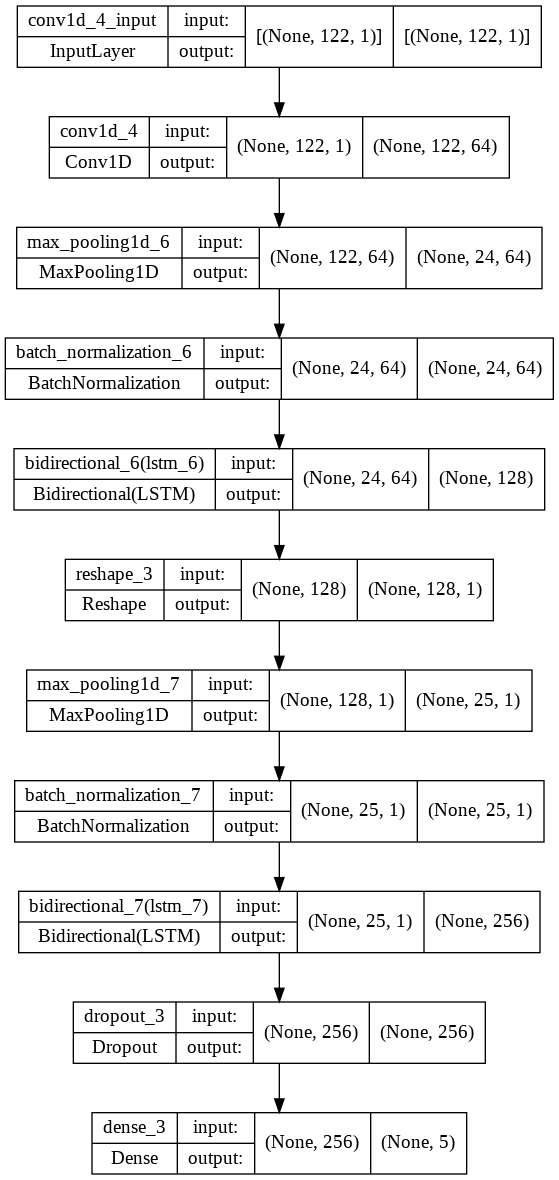

In [106]:
# representation of model layers
from tensorflow.keras.utils import plot_model
plot_model(cnn_bilstm, show_shapes=True, to_file='model_cnn_bilstm.png')

In [107]:
#Split data: 80% training and 20% testing 
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 101)

In [108]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [109]:
x_columns_train = train_df_2.columns.drop('Class')
x_train_array = train_X[x_columns_train].values
x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))
    
dummies = pd.get_dummies(train_y) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y_train_1 = dummies.values
    
x_columns_test = test_df_2.columns.drop('Class')
x_test_array = test_df_2[x_columns_test].values
x_test_1=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))
    
dummies_test = pd.get_dummies(y_test) # Classification
outcomes_test = dummies_test.columns
num_classes = len(outcomes_test)
y_test_1 = dummies_test.values  

In [110]:
history= cnn_bilstm.fit(x_train_1, y_train_1,validation_data=(x_test_1,y_test_1), epochs=20) 

Epoch 1/20
3150/3150 [==============================] - 265s 82ms/step - loss: 0.0752 - accuracy: 0.9779 - val_loss: 1.4255 - val_accuracy: 0.7300
Epoch 2/20
3150/3150 [==============================] - 253s 80ms/step - loss: 0.0403 - accuracy: 0.9863 - val_loss: 1.1532 - val_accuracy: 0.7673
Epoch 3/20
3150/3150 [==============================] - 252s 80ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 1.3251 - val_accuracy: 0.7917
Epoch 4/20
3150/3150 [==============================] - 253s 80ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 1.4681 - val_accuracy: 0.7310
Epoch 5/20
3150/3150 [==============================] - 250s 79ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 1.3657 - val_accuracy: 0.7793
Epoch 6/20
3150/3150 [==============================] - 252s 80ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 1.7846 - val_accuracy: 0.7717
Epoch 7/20
3150/3150 [==============================] - 251s 80ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 1

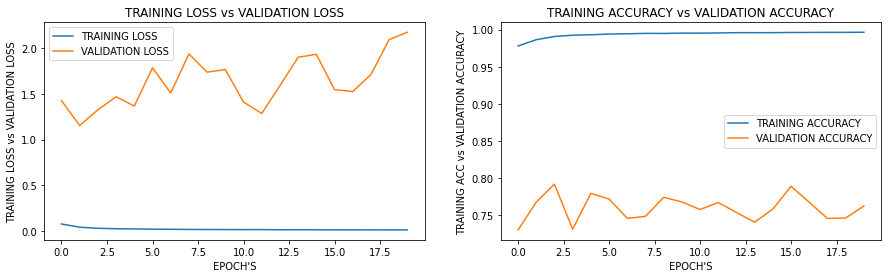

In [111]:
    #use matplitlib to draw the plots of last epoch
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label = "TRAINING LOSS")
    plt.plot(history.history['val_loss'], label = "VALIDATION LOSS")
    plt.title("TRAINING LOSS vs VALIDATION LOSS")
    plt.xlabel("EPOCH'S")
    plt.ylabel("TRAINING LOSS vs VALIDATION LOSS")
    plt.legend(loc = "best")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label = "TRAINING ACCURACY")
    plt.plot(history.history['val_accuracy'], label = "VALIDATION ACCURACY")
    plt.title("TRAINING ACCURACY vs VALIDATION ACCURACY")
    plt.xlabel("EPOCH'S")
    plt.ylabel("TRAINING ACC vs VALIDATION ACCURACY")
    plt.legend(loc = "best")

In [112]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

pred1 = cnn_bilstm.predict(x_test_1)
pred2 = np.argmax(pred1,axis=1)
pred = le.fit_transform(pred2)
#pred = le.inverse_transform(pred)
y_eval = np.argmax(y_test_1,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}%".format(score*100)) 

Validation score: 76.22427253371185%


In [113]:
acc = accuracy_score(y_eval, pred)
print("accuracy : ",acc)
recall = recall_score(y_eval, pred, average=None)
print("recall : ",recall)
precision = precision_score(y_eval, pred, average=None)
print("precision : ",precision)
f1_scr = f1_score(y_eval, pred, average=None)
print("f1_score : ",f1_scr)

accuracy :  0.7622427253371186
recall :  [0.819437   0.92648397 0.67699298 0.09863317 0.04477612]
precision :  [0.95530552 0.6890276  0.68064784 0.6137931  0.6       ]
f1_score :  [0.88217043 0.79030449 0.67881549 0.16995544 0.08333333]


In [114]:
# 0:Dos  1:normal  2:Probe  3:R2L  4:U2L          
print("####   0:Dos  1:normal  2:Probe  3:R2L  4:U2L  ###\n\n")
print(classification_report(pred, y_eval))

####   0:Dos  1:normal  2:Probe  3:R2L  4:U2L  ###


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6399
           1       0.93      0.69      0.79     13297
           2       0.68      0.68      0.68      2408
           3       0.10      0.61      0.17       435
           4       0.04      0.60      0.08         5

    accuracy                           0.76     22544
   macro avg       0.51      0.71      0.52     22544
weighted avg       0.85      0.76      0.79     22544



[[6113 1144   92  111    0]
 [  72 9162  651    4    0]
 [ 214  522 1639   46    0]
 [   0 2412   26  267    2]
 [   0   57    0    7    3]] 



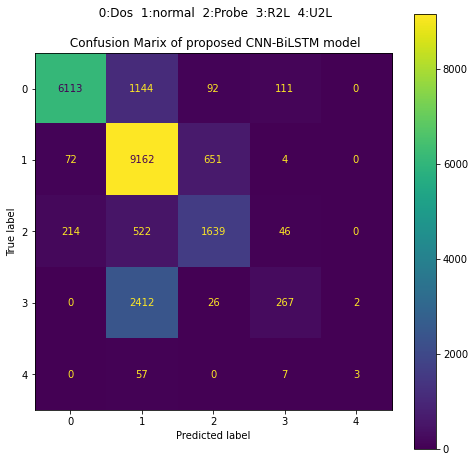

In [115]:
#confusion matrix 
#import seaborn as sns
#%matplotlib inline

cm = confusion_matrix(y_eval, pred2)
print(cm,'\n')
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.title('  0:Dos  1:normal  2:Probe  3:R2L  4:U2L \n\n Confusion Marix of proposed CNN-BiLSTM model')
plt.show()

n_classes: 5


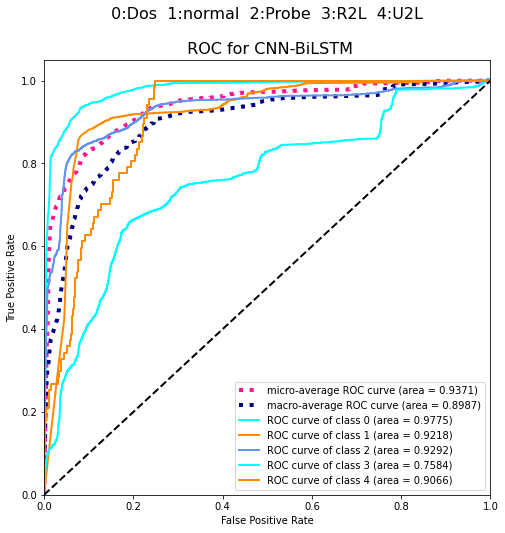

In [116]:
# ROC curve：

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)

        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
    print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        
        
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        
        
        
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

#y_true_2= le.transform(np.argmax(y_test_1,axis=1))
RoC_Curve(pred1, y_eval, le.classes_, title=' 0:Dos  1:normal  2:Probe  3:R2L  4:U2L \n\n ROC for CNN-BiLSTM')

In [117]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("TP = ", TP)
print("TN = ", TN)
print("FP = ", FP)
print("FN = ", FN)
print("\n")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("TPR = ", TPR , "  True positive rate, Sensitivity, hit rate, or recall")
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("FPR = ", FPR, "  False positive rate or fall out")
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("TNR = ", TNR, "  True negative rate or specificity")
# False negative rate
FNR = FN/(TP+FN)
print("FNR = ", FNR, "  False negative rate")
print("\n")

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("PPV = ", PPV, "  Positive predictive value or precision")
# Negative predictive value
NPV = TN/(TN+FN)
print("NPV = ", NPV, "  Negative predictive value")
# False discovery rate
FDR = FP/(TP+FP)
print("FDR = ", FDR, "  False discovery rate")
print("\n")

# Overall accuracy
#ACC = (TP+TN)/(TP+FP+FN+TN)
#print("ACC = ", ACC)

TP =  [6.113e+03 9.162e+03 1.639e+03 2.670e+02 3.000e+00]
TN =  [14798.  8520. 19354. 19669. 22475.]
FP =  [2.860e+02 4.135e+03 7.690e+02 1.680e+02 2.000e+00]
FN =  [1347.  727.  782. 2440.   64.]


TPR =  [0.819437   0.92648397 0.67699298 0.09863317 0.04477612]   True positive rate, Sensitivity, hit rate, or recall
FPR =  [1.89604879e-02 3.26748321e-01 3.82149779e-02 8.46902253e-03
 8.89798461e-05]   False positive rate or fall out
TNR =  [0.98103951 0.67325168 0.96178502 0.99153098 0.99991102]   True negative rate or specificity
FNR =  [0.180563   0.07351603 0.32300702 0.90136683 0.95522388]   False negative rate


PPV =  [0.95530552 0.6890276  0.68064784 0.6137931  0.6       ]   Positive predictive value or precision
NPV =  [0.9165686  0.92137991 0.96116408 0.8896377  0.99716048]   Negative predictive value
FDR =  [0.04469448 0.3109724  0.31935216 0.3862069  0.4       ]   False discovery rate


